In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-test-graphs-5-3/test_graphs.bin
/kaggle/input/train-test-graphs-5-3/train_graphs.bin


In [6]:
!pip install dgl-cu110 -f https://data.dgl.ai/wheels/repo.html
!pip install torch

Looking in links: https://data.dgl.ai/wheels/repo.html


In [7]:
from dgl.data.utils import load_graphs

train_graphs, train_graph_labels_dict = load_graphs('../input/train-test-graphs-5-3/train_graphs.bin')
train_graph_labels = train_graph_labels_dict['labels']
test_graphs, test_graph_labels_dict = load_graphs('../input/train-test-graphs-5-3/test_graphs.bin')
test_graph_labels = test_graph_labels_dict['labels']

In [12]:
print('训练样本数： ', len(train_graphs))
print('测试样本数： ', len(test_graphs))

训练样本数：  66236
测试样本数：  16561


In [13]:
import torch

# get the name of GPU
device = torch.device("cuda")

# train_data for cuda
gpu_train_g = []
for g in train_graphs:
    gpu_train_g.append(g.to(device))

gpu_train_l = train_graph_labels.to(device)

# test_data for cuda
gpu_test_g = []
for g in test_graphs:
    gpu_test_g.append(g.to(device))

gpu_test_l = test_graph_labels.to(device)

In [14]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

N = 20
t = 10
k = 10  # the number of rows for the output tensor (k = 10, 20)
T = 5
overlap = 3 # note: overlap depends on T

apps = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 
        'phim247', 'popskid', 'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h',
        'freefire', 'among_us', 'azar', 'comico', 'nimotv', 'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm',
        'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360', 'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi247',
        'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news', 'twitter', 
        'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook','hahalolo', 
        'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 
        'cake', 'mobile_legend', 'co_tuong_online', 'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 
        'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may', 'podcast_player', 'pubg', 
        'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

# SAME = ['zingmp3', 'fptplay', 'baomoi', 'nimotv', 'messenger', 'tiki', 'facebook', 'lienquan_mobile', 'quora', 'among_us', 'azar', 'tiktok', 'medoctruyen', 'weeboo', 'tinder', 'hago', 'bida']

features = ['complete_max', 'complete_min', 'complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num', 'complete_10per', 'complete_20per', 'complete_30per', 'complete_40per', 'complete_50per', 
        'complete_60per', 'complete_70per', 'complete_80per', 'complete_90per', 'out_max', 'out_min', 'out_mean', 'out_mad', 'out_std',
        'out_var', 'out_skew', 'out_kurt', 'out_pkt_num', 'out_10per', 'out_20per', 'out_30per', 'out_40per', 'out_50per', 'out_60per',
        'out_70per', 'out_80per', 'out_90per', 'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 
        'in_pkt_num', 'in_10per', 'in_20per', 'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per', 'in_90per', 
        'protocol', 'flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4'
       ]

root_path = '/content/drive/MyDrive/researchHub/MAppGraph/mappgraph/data'

In [15]:
from dgl.data import DGLDataset
from dgl.data.utils import load_graphs

# g, l = load_graphs('sample/train_graphs.bin')

class Traindataset(DGLDataset):
  _url = 'http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/qm7b.mat'
  _sha1_str = '4102c744bb9d6fd7b40ac67a300e49cd87e28392'

  def __init__(self, raw_dir=None, force_reload=False, verbose=False):
    super().__init__(name='qm7b',
            url=self._url,
            raw_dir=raw_dir,
            force_reload=force_reload,
            verbose=verbose)

  def process(self):
    # 将数据处理为图列表和标签列表
#     self.graphs, self.label = new_train_g, new_train_l
    self.graphs, self.label = gpu_train_g, gpu_train_l

  def __getitem__(self, idx):
    """ 通过idx获取对应的图和标签

    Parameters
    ----------
    idx : int
        Item index

    Returns
    -------
    (dgl.DGLGraph, Tensor)
    """
    return self.graphs[idx], self.label[idx]

  def __len__(self):
    """数据集中图的数量"""
    return len(self.graphs)
  
  @property
  def num_labels(self):
    return 101

In [17]:
from dgl.dataloading import GraphDataLoader

dataset = Traindataset()
dataloader = GraphDataLoader(
  dataset,
  batch_size=100,
  drop_last=True,
  shuffle=True)
print('训练样本-图0', dataset[0])

训练样本-图0 (Graph(num_nodes=3, num_edges=6,
      ndata_schemes={'attr': Scheme(shape=(63,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}), tensor(0, device='cuda:0'))


In [18]:
import dgl
import torch
import dgl.nn.pytorch as dglnn
import torch.nn as nn
from dgl.nn.pytorch.conv import GATConv
from dgl.nn.pytorch.conv import DenseGraphConv
from dgl.nn.pytorch.glob import SortPooling
import torch.nn.functional as F


class Classifier(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Classifier, self).__init__()
    self.gat1 = GATConv(in_dim, hidden_dim, 5)
    self.gat2 = GATConv(hidden_dim*5, hidden_dim, 5)
    
    self.sortpooling = SortPooling(k=16)
    self.conv1D_1 = nn.Conv1d(1, 128, kernel_size=3)
    self.maxpooling = nn.MaxPool1d(3)
    self.conv1D_2 = nn.Conv1d(128, 256, kernel_size=2)
    self.classify = nn.Linear(256*531, n_classes)

  def forward(self, g, h):
    # print('raw_shape:',h.size())
    # GATConv
    h = F.relu(self.gat1(g, h))
    # print('l1_out:', h.size())
    h = h.flatten(1)
    # print('l1_flatten:', h.size())
    h = F.relu(self.gat2(g, h))
    # print('l2_out:', h.size())
    h = h.flatten(1)
    # print('l2_flatten:', h.size())

    # sortpool——图池化
    h = self.sortpooling(g, h)
    h = h.view(100, 1, 1600)
    h = self.conv1D_1(h)
    h = self.maxpooling(h)
    h = self.conv1D_2(h)
    h = F.relu(h.flatten(1))
    h = F.dropout(h)
    with g.local_scope():
        return self.classify(h)

In [19]:
import torch
import torch.nn as nn

model = Classifier(63, 20, 101)
model.to(device)

opt = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()

epoch_losses = []
for epoch in range(100):
  epoch_loss = 0
  i = 0
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      logits = model(batched_graph, feats)
      loss = F.cross_entropy(logits, labels)
      opt.zero_grad()
      loss.backward()
      opt.step()
      epoch_loss += loss.detach().item()
      i += 1
  epoch_loss /= (i+1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 3.1066
Epoch 1, loss 1.6293
Epoch 2, loss 1.2288
Epoch 3, loss 1.0041
Epoch 4, loss 0.8619
Epoch 5, loss 0.7628
Epoch 6, loss 0.7003
Epoch 7, loss 0.6392
Epoch 8, loss 0.6018
Epoch 9, loss 0.5673
Epoch 10, loss 0.5248
Epoch 11, loss 0.4961
Epoch 12, loss 0.4787
Epoch 13, loss 0.4574
Epoch 14, loss 0.4373
Epoch 15, loss 0.4157
Epoch 16, loss 0.4061
Epoch 17, loss 0.3887
Epoch 18, loss 0.3788
Epoch 19, loss 0.3671
Epoch 20, loss 0.3529
Epoch 21, loss 0.3455
Epoch 22, loss 0.3335
Epoch 23, loss 0.3342
Epoch 24, loss 0.3240
Epoch 25, loss 0.3083
Epoch 26, loss 0.3025
Epoch 27, loss 0.3076
Epoch 28, loss 0.2980
Epoch 29, loss 0.2883
Epoch 30, loss 0.2842
Epoch 31, loss 0.2802
Epoch 32, loss 0.2766
Epoch 33, loss 0.2697
Epoch 34, loss 0.2602
Epoch 35, loss 0.2609
Epoch 36, loss 0.2569
Epoch 37, loss 0.2524
Epoch 38, loss 0.2443
Epoch 39, loss 0.2437
Epoch 40, loss 0.2428
Epoch 41, loss 0.2310
Epoch 42, loss 0.2312
Epoch 43, loss 0.2286
Epoch 44, loss 0.2229
Epoch 45, loss 0.221

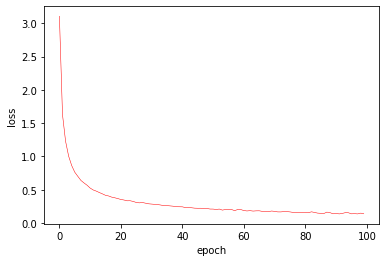

In [20]:
!pip install matplotlib
import matplotlib.pyplot as plt


plt.xlabel("epoch")
plt.ylabel("loss")
x = list(range(len(epoch_losses)))
# print(x)
plt.plot(x,epoch_losses,linewidth=0.5,c='red')
plt.show()

In [21]:
class Testdataset(Traindataset):
  def process(self):
    # 将数据处理为图列表和标签列表
    self.graphs, self.label = gpu_test_g, gpu_test_l

In [22]:
dataset = Testdataset()
dataloader = GraphDataLoader(
  dataset,
  batch_size=100,
  drop_last=T,
  shuffle=True)

In [23]:
from sklearn.metrics import classification_report
# Test the model
model.eval()  # eval mode(batch norm uses moving mean/variance 
              #instead of mini-batch mean/variance)
with torch.no_grad():
  pred = []
  true = []
  for batched_graph, labels in dataloader:
      feats = batched_graph.ndata['attr']
      outputs = model(batched_graph, feats)
      _, predicted = torch.max(outputs.data, 1)
      pred.extend(predicted.cuda().data.cpu().numpy())
      true.extend(labels.cuda().data.cpu().numpy())
  
print(classification_report(true, pred, target_names=apps, digits=4))

                          precision    recall  f1-score   support

                  diijam     0.9216    0.8868    0.9038       106
                  baomoi     0.9732    0.9477    0.9603       153
                 fptplay     0.9576    0.9826    0.9700       115
                   iQIYI     0.9891    0.9731    0.9810       186
                    bigo     0.9718    0.9718    0.9718       248
                 myradio     0.9450    0.8655    0.9035       119
                 spotify     0.9479    0.9479    0.9479       211
              nhaccuatui     0.9864    0.9699    0.9781       299
              soundcloud     0.9755    0.9900    0.9827       201
              sachnoiapp     0.8298    0.8540    0.8417       137
                 phim247     0.9113    0.9339    0.9224       121
                 popskid     0.9848    0.9630    0.9738       135
  truyenaudiosachnoiviet     0.8667    0.8814    0.8739        59
                   vieon     0.9725    0.9464    0.9593       112
         